In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [13]:
# Step 1: Load the Dataset
df = pd.read_csv("customer_data.csv")
print(df)

    CustomerID  Age  Annual Income  Spending Score
0            1   19          15000              39
1            2   21          18000              81
2            3   20          21000               6
3            4   23          26000              77
4            5   31          40000              40
5            6   22          27000              76
6            7   35          58000              50
7            8   40          60000              35
8            9   50          72000              80
9           10   42          54000              20
10          11   36          50000              65
11          12   25          33000              85
12          13   28          32000              90
13          14   45          59000              30
14          15   49          66000              70
15          16   30          37000              85
16          17   24          25000              95
17          18   29          28000              60
18          19   48          62

In [4]:
# Inspecting the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

Dataset Shape: (20, 4)
Missing Values:
 CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicates: 0
Data Types:
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        CustomerID        Age  Annual Income  Spending Score
count    20.00000  20.000000      20.000000       20.000000
mean     10.50000  32.750000   41750.000000       57.700000
std       5.91608  10.284761   17731.550827       26.370039
min       1.00000  19.000000   15000.000000        6.000000
25%       5.75000  23.750000   26750.000000       38.000000
50%      10.50000  30.500000   38500.000000       62.500000
75%      15.25000  40.500000   58250.000000       80.250000
max      20.00000  50.000000   72000.000000       95.000000


In [5]:
# Step 2: Data Preprocessing
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Age', 'Annual Income', 'Spending Score']])

C:\Users\Santhosh Reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


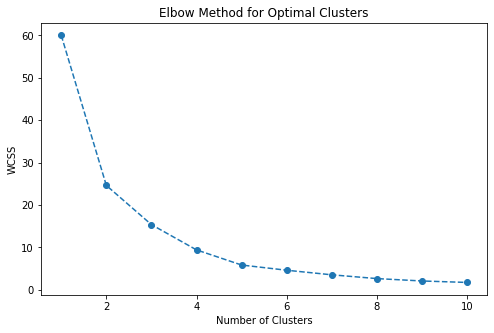

In [7]:
# Step 3: Determine the optimal number of clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [8]:
# Choosing optimal clusters (e.g., based on elbow method)
k_optimal = 4  # Change based on elbow point
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

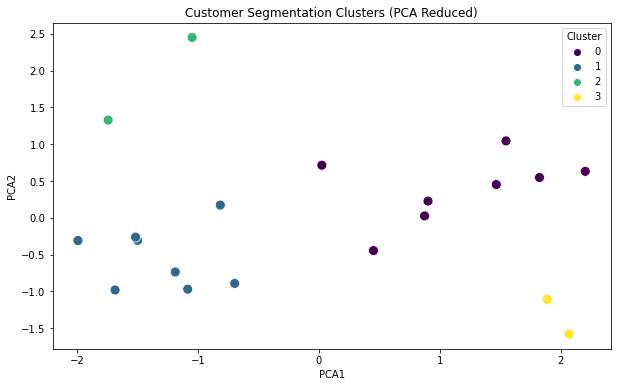

In [9]:
# Step 4: Visualization using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100)
plt.title("Customer Segmentation Clusters (PCA Reduced)")
plt.show()

In [10]:
# Silhouette Score
t_score = silhouette_score(df_scaled, df['Cluster'])
print("Silhouette Score:", t_score)


Silhouette Score: 0.5357563690906715


In [11]:
# Save the clustered dataset
df.to_csv("customer_segmented.csv", index=False)

# Recommendations
print("Cluster Insights:")
print("- Target high spenders for loyalty programs")
print("- Create personalized marketing for each segment")
print("- Offer premium products to high-income customers")


Cluster Insights:
- Target high spenders for loyalty programs
- Create personalized marketing for each segment
- Offer premium products to high-income customers


In [12]:
print(df)

    CustomerID  Age  Annual Income  Spending Score  Cluster      PCA1  \
0            1   19          15000              39        2 -1.741655   
1            2   21          18000              81        1 -1.991489   
2            3   20          21000               6        2 -1.047557   
3            4   23          26000              77        1 -1.498302   
4            5   31          40000              40        0  0.025378   
5            6   22          27000              76        1 -1.514788   
6            7   35          58000              50        0  0.874773   
7            8   40          60000              35        0  1.467821   
8            9   50          72000              80        3  2.070216   
9           10   42          54000              20        0  1.548116   
10          11   36          50000              65        0  0.452213   
11          12   25          33000              85        1 -1.187118   
12          13   28          32000              90 